In [5]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import math
import ipywidgets as widgets
from ipywidgets import interactive

### Price Determination

In [20]:
# We assume price will rise as the Rf does
def forward_price(S0, Rf, T) :
    return S0*math.exp(Rf*T)

def pv_of_forward_contract(F0, K, Rf, T) :
    return (F0-K)*math.exp(-Rf*T)

F0 = forward_price(25, 0.1, 0.5)
print(F0)
print(pv_of_forward_contract(F0, 25, 0.1, 0.5))

26.281777409400604
1.2192643874821527


### Positions on Options

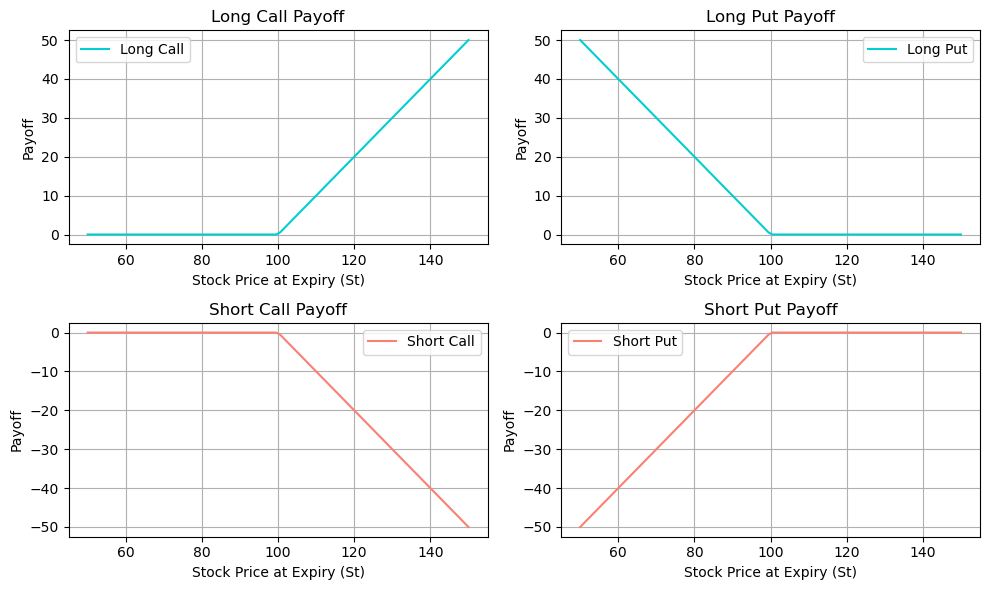

In [33]:
def plot_payoffs(K):
    St = np.linspace(0.5 * K, 1.5 * K, 100)
    
    call_payoff = np.maximum(St - K, 0)
    put_payoff = np.maximum(K - St, 0)
    
    fig, axes = plt.subplots(2, 2, figsize=(10, 6))  # Create a 2x2 grid of subplots
    
    # Long Call
    axes[0, 0].plot(St, call_payoff, label='Long Call', color='darkturquoise')
    axes[0, 0].set_title('Long Call Payoff')
    axes[0, 0].legend()
    axes[0, 0].grid()
    
    # Short Call
    axes[1, 0].plot(St, -call_payoff, label='Short Call', color='salmon')
    axes[1, 0].set_title('Short Call Payoff')
    axes[1, 0].legend()
    axes[1, 0].grid()
    
    # Long Put
    axes[0, 1].plot(St, put_payoff, label='Long Put', color='darkturquoise')
    axes[0, 1].set_title('Long Put Payoff')
    axes[0, 1].legend()
    axes[0, 1].grid()
    
    # Short Put
    axes[1, 1].plot(St, -put_payoff, label='Short Put', color='salmon')
    axes[1, 1].set_title('Short Put Payoff')
    axes[1, 1].legend()
    axes[1, 1].grid()
    
    for ax in axes.flat:
        ax.set_xlabel('Stock Price at Expiry (St)')
        ax.set_ylabel('Payoff')

    plt.tight_layout()  # Adjust layout to avoid overlap
    plt.show()

# Parameters
K = 100  # Strike price
plot_payoffs(K)

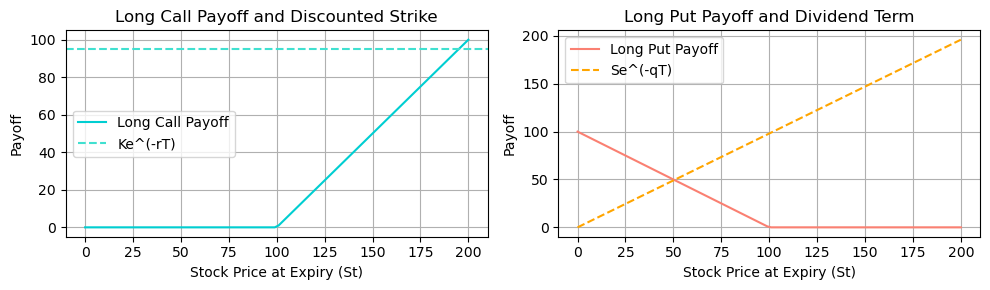

In [39]:
def plot_put_call_parity(K, r, T, q=0):
    St = np.linspace(0, 2 * K, 100)
    call_payoff = np.maximum(St - K, 0)
    put_payoff = np.maximum(K - St, 0)
    discounted_K = K * math.exp(-r * T)
    dividend_term = St * math.exp(-q * T)
    
    fig, axes = plt.subplots(1, 2, figsize=(10, 3))
    
    # Plot long call payoff and discounted strike price
    axes[0].plot(St, call_payoff, label='Long Call Payoff', color='darkturquoise')
    axes[0].axhline(y=discounted_K, color='turquoise', linestyle='--', label='Ke^(-rT)')
    axes[0].set_xlabel('Stock Price at Expiry (St)')
    axes[0].set_ylabel('Payoff')
    axes[0].set_title('Long Call Payoff and Discounted Strike')
    axes[0].legend()
    axes[0].grid()
    
    # Plot long put payoff and dividend term
    axes[1].plot(St, put_payoff, label='Long Put Payoff', color='salmon')
    axes[1].plot(St, dividend_term, label='Se^(-qT)', color='orange', linestyle='--')
    axes[1].set_xlabel('Stock Price at Expiry (St)')
    axes[1].set_ylabel('Payoff')
    axes[1].set_title('Long Put Payoff and Dividend Term')
    axes[1].legend()
    axes[1].grid()
    
    plt.tight_layout()
    plt.show()

# Parameters
K = 100  # Strike price
r = 0.05  # Risk-free rate
T = 1    # Time to expiry
q = 0.02  # Dividend yield

plot_put_call_parity(K, r, T, q)

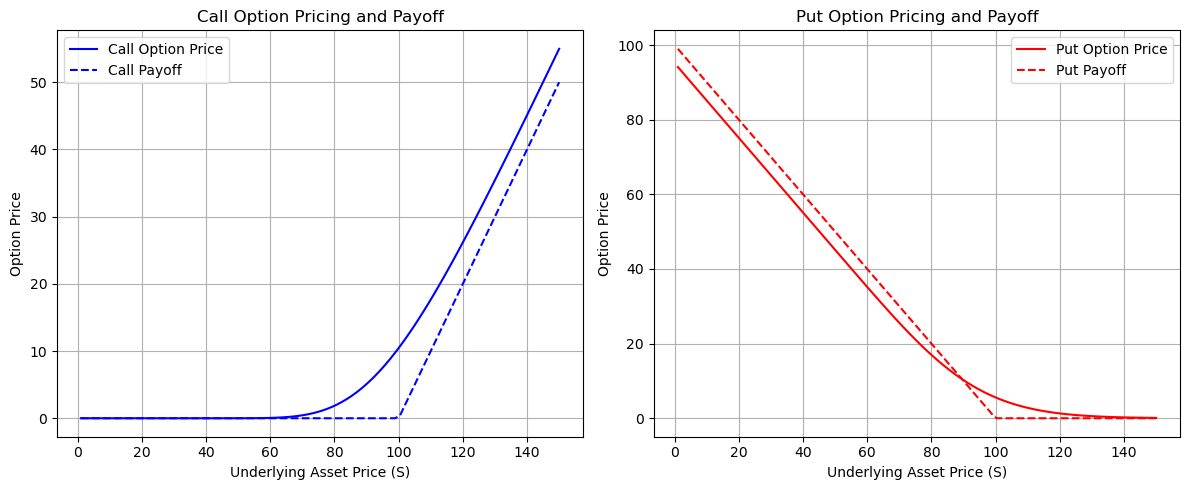

In [18]:
def black_scholes(S, K, T, r, sigma, option_type="call"):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)

    if option_type == "call":
        return S * si.norm.cdf(d1) - K * np.exp(-r * T) * si.norm.cdf(d2)
    elif option_type == "put":
        return K * np.exp(-r * T) * si.norm.cdf(-d2) - S * si.norm.cdf(-d1)
    else:
        raise ValueError("option_type must be 'call' or 'put'")

# Parameters
K = 100       # Strike price
T = 1         # Time to maturity (1 year)
r = 0.05      # Risk-free rate (5%)
sigma = 0.2   # Volatility (20%)

# Create an array for underlying prices
S_range = np.linspace(1, 150, 100)  # From 50 to 150

# Compute option prices
call_prices = [black_scholes(S, K, T, r, sigma, "call") for S in S_range]
put_prices = [black_scholes(S, K, T, r, sigma, "put") for S in S_range]

# Compute Pay-Offs
call_payoff = [max(S - K, 0) for S in S_range]
put_payoff = [max(K - S, 0) for S in S_range]

# Plot results on two separate subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot call option price and payoff
axes[0].plot(S_range, call_prices, label="Call Option Price", color="blue")
axes[0].plot(S_range, call_payoff, '--', label="Call Payoff", color="blue")
axes[0].set_xlabel("Underlying Asset Price (S)")
axes[0].set_ylabel("Option Price")
axes[0].set_title("Call Option Pricing and Payoff")
axes[0].legend()
axes[0].grid()

# Plot put option price and payoff
axes[1].plot(S_range, put_prices, label="Put Option Price", color="red")
axes[1].plot(S_range, put_payoff, '--', label="Put Payoff", color="red")
axes[1].set_xlabel("Underlying Asset Price (S)")
axes[1].set_ylabel("Option Price")
axes[1].set_title("Put Option Pricing and Payoff")
axes[1].legend()
axes[1].grid()

plt.tight_layout()
plt.show()

In [20]:
# Create an array for underlying prices
S_range = np.linspace(1, 150, 100)  # From 50 to 150

# Create the interactive pricer function
def plot_call_pricer(K, T, r, sigma):
    # Compute call option prices
    call_prices = [black_scholes(S, K, T, r, sigma, "call") for S in S_range]

    # Create the plot
    fig, ax = plt.subplots(figsize=(5, 3))
    ax.plot(S_range, call_prices, label="Call Option Price", color="blue")
    ax.set_xlabel("Underlying Asset Price (S)")
    ax.set_ylabel("Option Price")
    ax.set_title("Call Option Pricing")
    ax.legend()
    ax.grid()

    plt.show()

# Define the widgets for the parameters
K_slider = widgets.FloatSlider(value=100, min=50, max=150, step=1, description="K (Strike):")
T_slider = widgets.FloatSlider(value=1, min=0.1, max=10, step=0.1, description="T (Maturity):")
r_slider = widgets.FloatSlider(value=0.05, min=0, max=0.1, step=0.01, description="r (Rate):")
sigma_slider = widgets.FloatSlider(value=0.2, min=0.01, max=1, step=0.01, description="σ (Volatility):")

# Use interactive to bind the widgets to the plot function
interactive_plot = interactive(plot_call_pricer,
                               K=K_slider, 
                               T=T_slider, 
                               r=r_slider, 
                               sigma=sigma_slider)

# Display the interactive widgets
display(interactive_plot)

interactive(children=(FloatSlider(value=100.0, description='K (Strike):', max=150.0, min=50.0, step=1.0), Floa…